In [1]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
import pandas as pd
from glob import glob
import xarray as xr
import os
import zipfile
import pickle as cPickle
from scipy import stats
from matplotlib.pyplot import cm
import pickle

from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import warnings
warnings.filterwarnings('ignore')


output_folder = '/pl/active/icesheetsclimate/firn_iceshelves/deg0C/'

In [2]:
def get_pickle_data(site):
    site_file = f'{output_folder}pickles/{site}.p'
    with open(site_file, 'rb') as fp:
        data = pickle.load(fp)
    return data

In [3]:
site = 'VIR15'

da = xr.open_dataset('/projects/dedu0223/SNOWPACK_WAIS/firn_project/output/netcdfs/SNOWPACK_FAC/ssp5_TP1.nc')
da_site = da.sel(site = site)
d = get_pickle_data(site)
d_pro = d['ssp5']['pro']

In [4]:
year_sum = da_site.groupby(da_site.time.dt.year).sum()
year_mean = da_site.groupby(da_site.time.dt.year).mean()

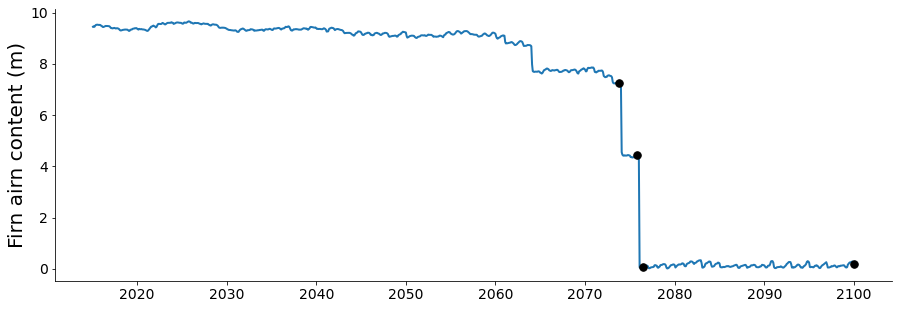

In [6]:
i1 = 705
i2 = 729
i3=736
i4=-1

fac = da_site.fac.values
time = da_site.time

fig,ax = plt.subplots(figsize =(15,5))
ax.plot(time, fac, linewidth = 2)
#ax.plot(year_mean.year, year_mean.fac, linewidth = 2)
ax.plot(time[i1],fac[i1],'k.', markersize = 15)
ax.plot(time[i2],fac[i2],'k.', markersize = 15)
ax.plot(time[i3],fac[i3],'k.', markersize = 15)
ax.plot(time[i4],fac[i4],'k.', markersize = 15)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.tick_params(axis='x', labelsize= 14)
ax.tick_params(axis='y', labelsize= 14)
ax.set_ylabel('Firn airn content (m)', fontsize = 20)
plt.savefig('figures/FAC_ross.png', dpi=300, transparent = True, bbox_inches = 'tight')

In [5]:
def ax_params(ax):
    ax.set_ylim([95,100])
    ax.plot([830,830],[70,100],'k--')
    ax.set_yticks([95,96,97,98,99,100])
    ax.set_yticklabels([5,4,3,2,1,0], fontsize = 22)
    ax.grid()
    ax.set_xlim([200,1000])
    ax.set_xticks([400,600,800])
    ax.set_xticklabels([400,600,800], fontsize = 22)
    
def get_ice(pro):

    ice = np.zeros((len(pro['depth']), 1000))
    for i in range(len(pro['depth'])):
        d = pro['density'][i]
        if d>830: ice[i,:int(d)] = 1
    ice[ice==0]=np.nan
    return ice

In [10]:
i1=3066
i2=3173
i3=3201
i4=-520

ice1 = get_ice(d_pro[i1])
ice2 = get_ice(d_pro[i2])
ice3 = get_ice(d_pro[i3])
ice4 = get_ice(d_pro[i4])

In [8]:
viridis = cm.get_cmap('viridis', 1)
newcolors = viridis(np.linspace(0, 1, 1))
pink = np.array([178/256, 200/256, 223/256, 1])
newcolors[:, :] = pink
newcmp = ListedColormap(newcolors)

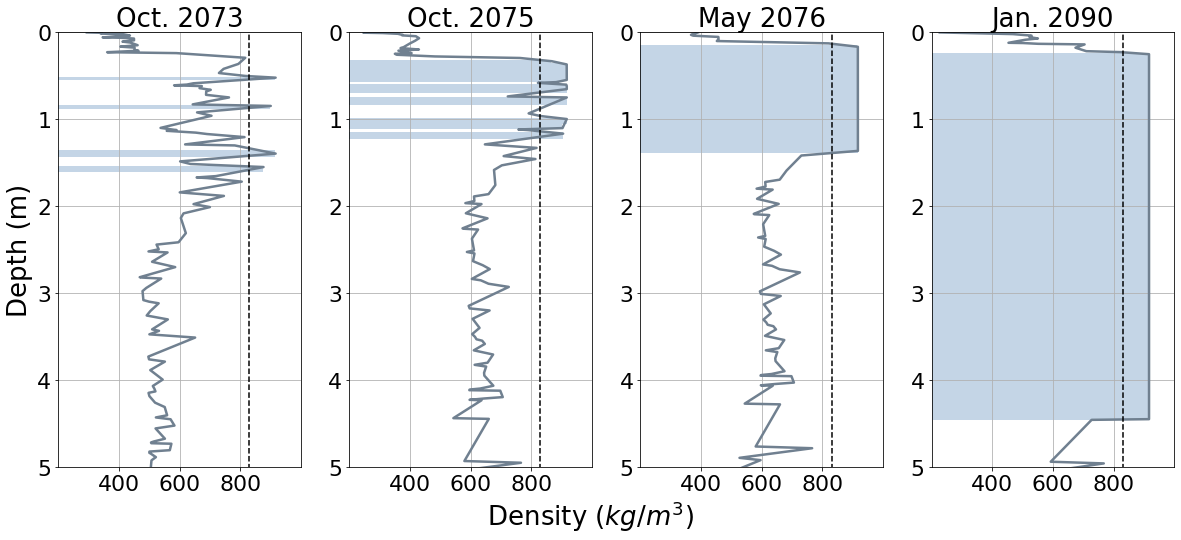

In [12]:

x = np.linspace(0,999,1000)

fig,ax = plt.subplots(1,4,figsize = (20,8))
ax[0].plot(d_pro[i1]['density'],d_pro[i1]['depth'], linewidth = 2.5, color = 'slategrey')
#ax[0].set_title(d_pro[i1]['date'])
ax[0].set_title('Oct. 2073', fontsize = 26)
ax[0].pcolormesh(x, d_pro[i1]['depth'], ice1, cmap = newcmp, vmin = 0, vmax = 2, alpha = 0.75)
ax_params(ax[0])


ax[1].plot(d_pro[i2]['density'],d_pro[i2]['depth'], linewidth = 2.5, color = 'slategrey')
#ax[1].set_title(d_pro[i2]['date'])
ax[1].pcolormesh(x, d_pro[i2]['depth'],ice2, cmap = newcmp, vmin = 0, vmax = 2, alpha = 0.75)
ax_params(ax[1])
ax[1].set_title('Oct. 2075', fontsize = 26)

ax[2].plot(d_pro[i3]['density'],d_pro[i3]['depth'], linewidth = 2.5, color = 'slategrey')
#ax[2].set_title(d_pro[i3]['date'])
ax[2].pcolormesh(x, d_pro[i3]['depth'],ice3, cmap = newcmp, vmin = 0, vmax = 2, alpha = 0.75)
ax_params(ax[2])
ax[2].set_title('May 2076', fontsize = 26)

ax[3].plot(d_pro[i4]['density'],d_pro[i4]['depth'], linewidth = 2.5, color = 'slategrey')
#ax[3].set_title(d_pro[i4]['date'])
ax[3].pcolormesh(x, d_pro[i4]['depth'],ice4, cmap = newcmp, vmin = 0, vmax = 2, alpha = 0.75)
ax_params(ax[3])
ax[3].set_title('Jan. 2090', fontsize = 26)




ax[1].set_xlabel('                             Density ($kg/m^3$)', fontsize = 26);
ax[0].set_ylabel('Depth (m)', fontsize = 26)
#ax[0].set_xlabel('Density ($kg/m^3$)', fontsize = 20);
plt.savefig('figures/density_profiles_ross_poster.png', dpi=300, transparent=True, bbox_inches = 'tight')